<font color='#808080'>
    
__Machine Learning Exercise (Multi-class Classification)__
The goal of this exercise is to familiarize with the method of applying multi-class classification techniques.
__Part One: Classification of Plants Based on Appearance Features__
Smart greenhouse technology primarily requires automatic identification of the types of plants in question. This identification is typically done using the appearance features of the plants. The attached dataset (file iris.csv) contains five columns. The first four columns are input features, including the length and width of the sepal and the length and width of the petal. The fifth column represents the output or class of the plant.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, jaccard_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [2]:
class color:
   PURPLE = '\033[95m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
set_option('display.width', 100)

In [4]:
print(color.BOLD + '## Load dataset ##' + color.END)
filename = 'Iris.csv'
names = ['Sepal_Length', 'Sepal_Width', 'Petal_Length','Petal_Width','Class']
df = read_csv(filename)

# shape
print(color.BOLD + '## shape ##' + color.END)
print(df.shape)

# types
print(color.BOLD + '## types ##' + color.END)
print(df.dtypes)

## Load dataset ##
## shape ##
(150, 5)
## types ##
Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Class            object
dtype: object


<font color='#808080'>
    
First, use 80% of the data (including 80% of each class) for training and the remaining 20% (including 20% of each class) for testing. Then, train the model to classify plants using the K-Nearest Neighbors (KNN) algorithm with K=5. Evaluate the model's performance on the test data by calculating accuracy, precision, recall, and the Jaccard score. Additionally, form a confusion matrix. (To understand the Jaccard score, search for the term "multiclass Jaccard similarity score.")

In [5]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


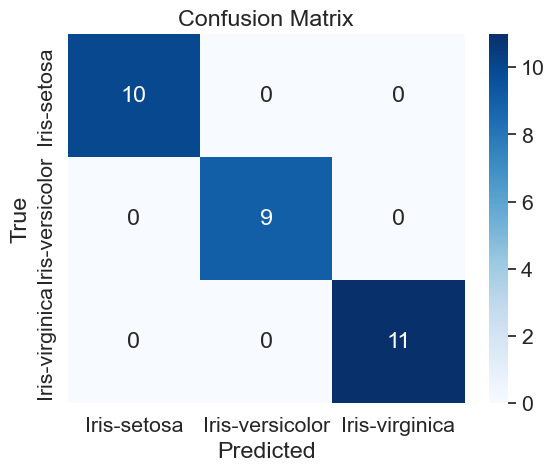

In [6]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
sns.set(font_scale = 1.4)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [7]:
print(color.BOLD + '## accuracy ##' + color.END)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy Score is: {:.2f}%".format(accuracy * 100))

print(color.BOLD + '## recall ##' + color.END)
recall = recall_score(y_test, y_pred, average='macro')
print("recall Score is: {:.2f}%".format(recall * 100))

print(color.BOLD + '## precision ##' + color.END)
precision = precision_score(y_test, y_pred, average='macro')
print("precision Score is: {:.2f}%".format(precision * 100))

print(color.BOLD + '## jaccard ##' + color.END)
jaccard = jaccard_score(y_test, y_pred, average='macro')
print("Jaccard Score is: {:.2f}%".format(jaccard * 100))

## accuracy ##
accuracy Score is: 100.00%
## recall ##
recall Score is: 100.00%
## precision ##
precision Score is: 100.00%
## jaccard ##
Jaccard Score is: 100.00%


<font color='#808080'>
    
Part B: Apply standard normalization to the data and repeat the requirements of part A (using the same method and the same value of K). Do the scores (accuracy) change? Why?

In [8]:
mean = X.mean()
std = X.std()
threshold = 3 * std
X = (X - X.min()) / (X.max() - X.min())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

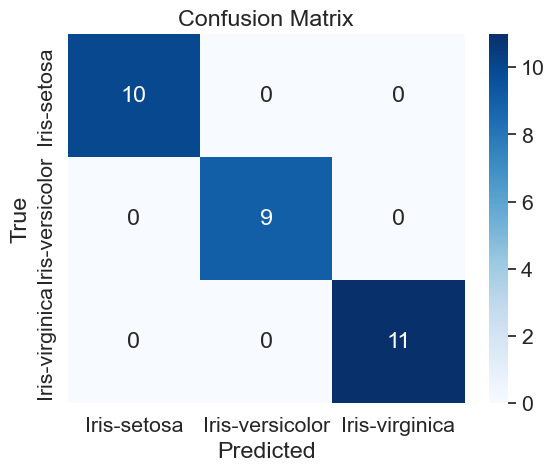

In [9]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
sns.set(font_scale = 1.4)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [9]:
print(color.BOLD + '## accuracy ##' + color.END)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy Score is: {:.2f}%".format(accuracy * 100))

print(color.BOLD + '## recall ##' + color.END)
recall = recall_score(y_test, y_pred, average='macro')
print("recall Score is: {:.2f}%".format(recall * 100))

print(color.BOLD + '## precision ##' + color.END)
precision = precision_score(y_test, y_pred, average='macro')
print("precision Score is: {:.2f}%".format(precision * 100))

print(color.BOLD + '## jaccard ##' + color.END)
jaccard = jaccard_score(y_test, y_pred, average='macro')
print("Jaccard Score is: {:.2f}%".format(jaccard * 100))

## accuracy ##
accuracy Score is: 100.00%
## recall ##
recall Score is: 100.00%
## precision ##
precision Score is: 100.00%
## jaccard ##
Jaccard Score is: 100.00%


<font color='#808080'>

Part Two: Predicting Song Genre and Popularity

A music website aims to increase its audience by analyzing songs released between the years 2000 and 2020, considering their genre and popularity. To achieve this, the website uses features such as the song's name, artist's name, release year, energy, rhythm, and tempo. The data is provided in the file musics.csv, which contains 18 columns. Two of these columns represent the output of the model: popularity and genre. The remaining 16 columns are input features.

In [10]:
print(color.BOLD + '## Load dataset ##' + color.END)
filename = 'musics.csv'
names = ['artist', 'song', 'duration_ms','explicit','year', 'popularity', 'danceability', 'energy',
        'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
        'valence', 'tempo', 'genre']
df = read_csv(filename)

# shape
print(color.BOLD + '## shape ##' + color.END)
print(df.shape)

# types
print(color.BOLD + '## types ##' + color.END)
print(df.dtypes)

## Load dataset ##
## shape ##
(2000, 18)
## types ##
artist               object
song                 object
duration_ms           int64
explicit               bool
year                  int64
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object


<font color='#808080'>

**Part A:** First, remove the columns for song name, release year, and artist name from the dataset (explain the reason). In the popularity column, the popularity of each song is represented by a number between 0 (least popular) and 100 (most popular). For simplicity, divide the popularity into five categories as follows: replace numbers 0 to 20 with 1 (unpopular), numbers 20 to 40 with 2 (low popularity), and so on.

In [11]:
df = df.drop('song', axis=1)
df = df.drop('artist', axis=1)
df = df.drop('year', axis=1)
# shape
print(color.BOLD + '## shape ##' + color.END)
print(df.shape)

# types
print(color.BOLD + '## types ##' + color.END)
print(df.dtypes)

## shape ##
(2000, 15)
## types ##
duration_ms           int64
explicit               bool
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object


In [12]:
df_popularity = df['popularity']
bins = [0, 20, 40, 60, 80, 100]
labels = [1, 2, 3, 4, 5]
categories = pd.cut(df_popularity, bins = bins, labels = labels, include_lowest=True)
has_nan = categories.isna().any().any()

if has_nan:
    # پیدا کردن مکان NaN
    nan_locations = np.where(categories.isna())
    print(nan_locations)
df['popularity'] = categories


In [13]:
df_popularity = df['popularity']
print(df_popularity)

0       4
1       4
2       4
3       4
4       4
       ..
1995    4
1996    4
1997    4
1998    4
1999    5
Name: popularity, Length: 2000, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


<font color='#808080'>

**Part B:** Convert qualitative input and output features into quantitative values. Only the column related to the explicit feature and the output genre are qualitative. The explicit feature has only two values, true and false, which can be converted to 1 and 0, respectively. The output genre can also be quantified as follows:

- Create a new column in the dataset named `new_genre`.
- Each genre is separated by a comma from other genres. Try to identify all existing genres.

**Continuation:**

- Calculate the total number of existing genres and create a zero vector of that size for each music in the `new_genre` column.
- Create a vector where each element represents a specific genre.
- For each music, set the element corresponding to its genre to 1.
- (For more explanations on this, you can search for the term "one hot encoding" on the internet.)

In [14]:
df['explicit'] = df['explicit'].replace({False: 0, True: 1})

C:\Users\leila\AppData\Local\Temp\ipykernel_10308\528023673.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['explicit'] = df['explicit'].replace({False: 0, True: 1})


In [15]:
print(df['explicit'])

0       0
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: explicit, Length: 2000, dtype: int64


In [16]:
def separate_genres(row):
    genres = row['genre'].split(',')
    return ','.join(genres)

In [17]:
df['new_genre'] = df.apply(separate_genres, axis=1)


In [18]:
all_genres = set()
for genres in df['new_genre']:
    all_genres.update(genres.split(','))
    
    
total_genres = len(all_genres)
print(total_genres)
print(color.BOLD + '## all genres ##' + color.END)    
for genre in all_genres:
    print(genre)

25
## all genres ##
 jazz
set()
 pop
 latin
 classical
 Folk/Acoustic
metal
Folk/Acoustic
rock
hip hop
latin
 metal
pop
 hip hop
 blues
country
Dance/Electronic
 R&B
 easy listening
World/Traditional
 country
 Dance/Electronic
 rock
easy listening
R&B


In [19]:
def one_hot_encoding(row, all_genres):
    genres = row['new_genre'].split(',')
    encoding = np.zeros(len(all_genres))
    for genre in genres:
        index = all_genres.index(genre)
        encoding[index] = 1
    return encoding

In [20]:
df['vector'] = df.apply(lambda row: one_hot_encoding(row, list(all_genres)), axis=1)
print(df['vector'])

0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
2       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
1995    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1996    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1997    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1998    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1999    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: vector, Length: 2000, dtype: object


In [21]:
print(df['genre'][0:5])

0             pop
1       rock, pop
2    pop, country
3     rock, metal
4             pop
Name: genre, dtype: object


<font color='#808080'>

**Part C:** Obtain the distribution of the dataset for all 13 features (all columns except the popularity, genre, and the three removed features). Display the distribution of the data according to different features. Use different colors to represent different levels of popularity based on this dispersion. For visualizing the data distribution, you can use heatmaps, scatter plots, histograms, or other appropriate charts. (Hint: Use your interpretation of the data's nature to choose the best visualization method.)

In [22]:
df_new = df
df_new = df_new.drop('genre', axis=1); df_new = df_new.drop('new_genre', axis=1); df_new = df_new.drop('vector', axis=1); 
df_new = df_new.drop('popularity', axis=1)

In [23]:
# shape
print(color.BOLD + '## shape ##' + color.END)
print(df_new.shape)

# types
print(color.BOLD + '## types ##' + color.END)
print(df_new.dtypes)

## shape ##
(2000, 13)
## types ##
duration_ms           int64
explicit              int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
dtype: object


## histograms ##


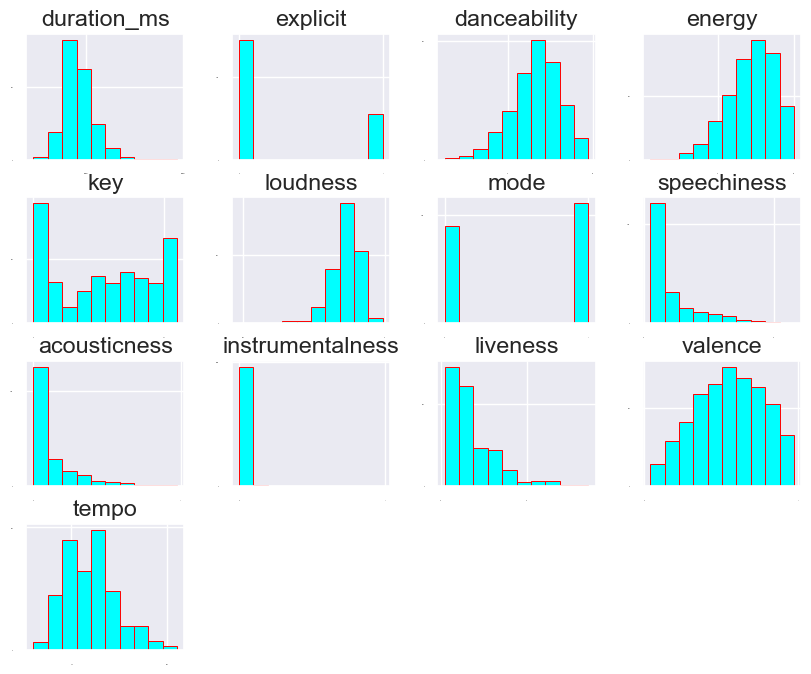

In [24]:
# histograms
df_new.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(10,8),linewidth=0.7,
             color = 'cyan', edgecolor = 'red')
print(color.BOLD + '## histograms ##' + color.END)
plt.show()

## density ##


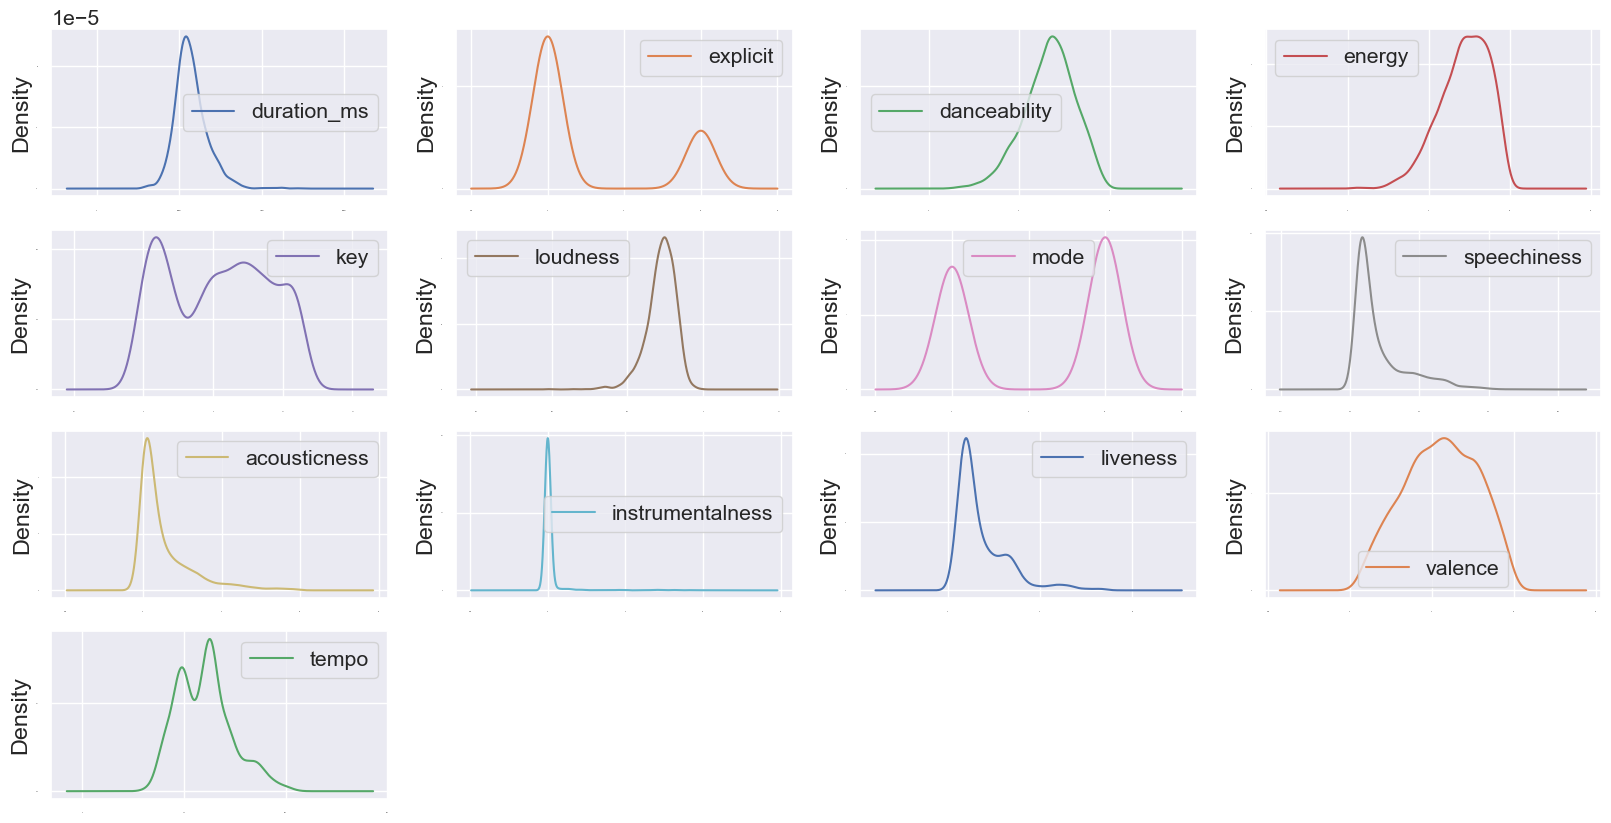

In [25]:
# density
df_new.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True,
fontsize=1,figsize=(20,10))
print(color.BOLD + '## density ##' + color.END)
plt.show()

##box and whisker plots ##


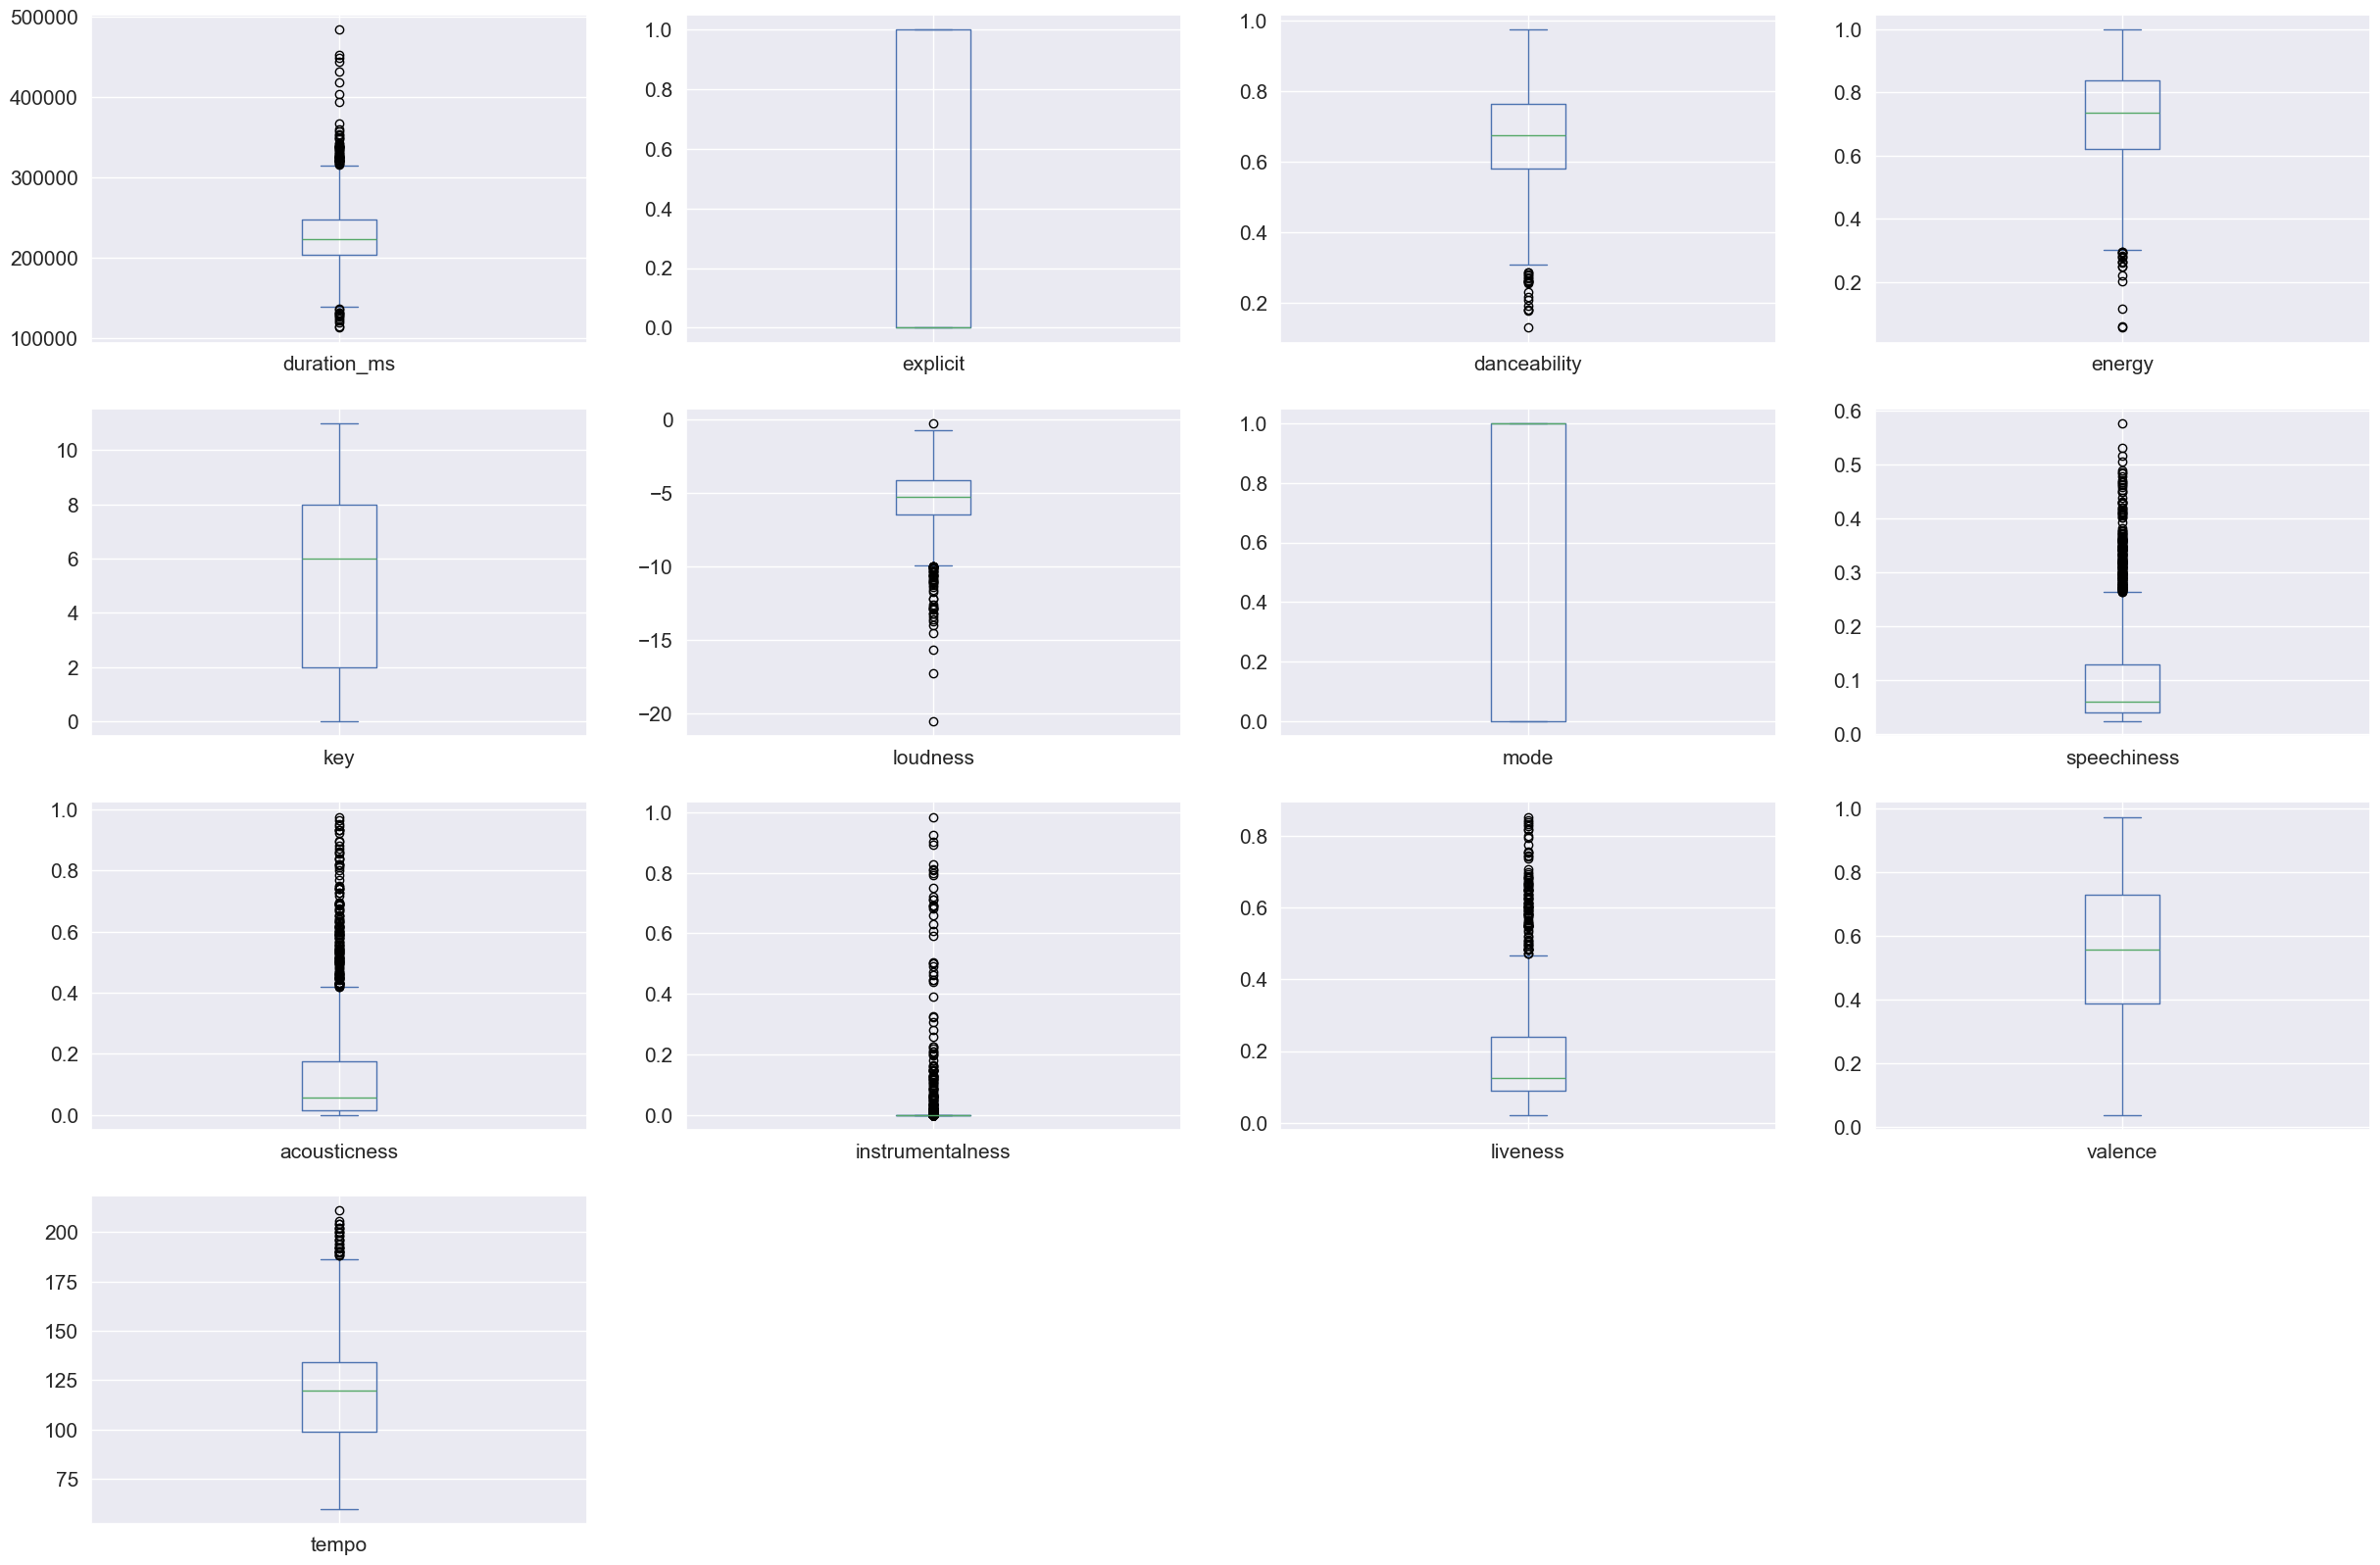

In [26]:
# box and whisker plots
df_new.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=15,figsize=(30,20))
print(color.BOLD + '##box and whisker plots ##' + color.END)
plt.show()

## correlation matrix ##


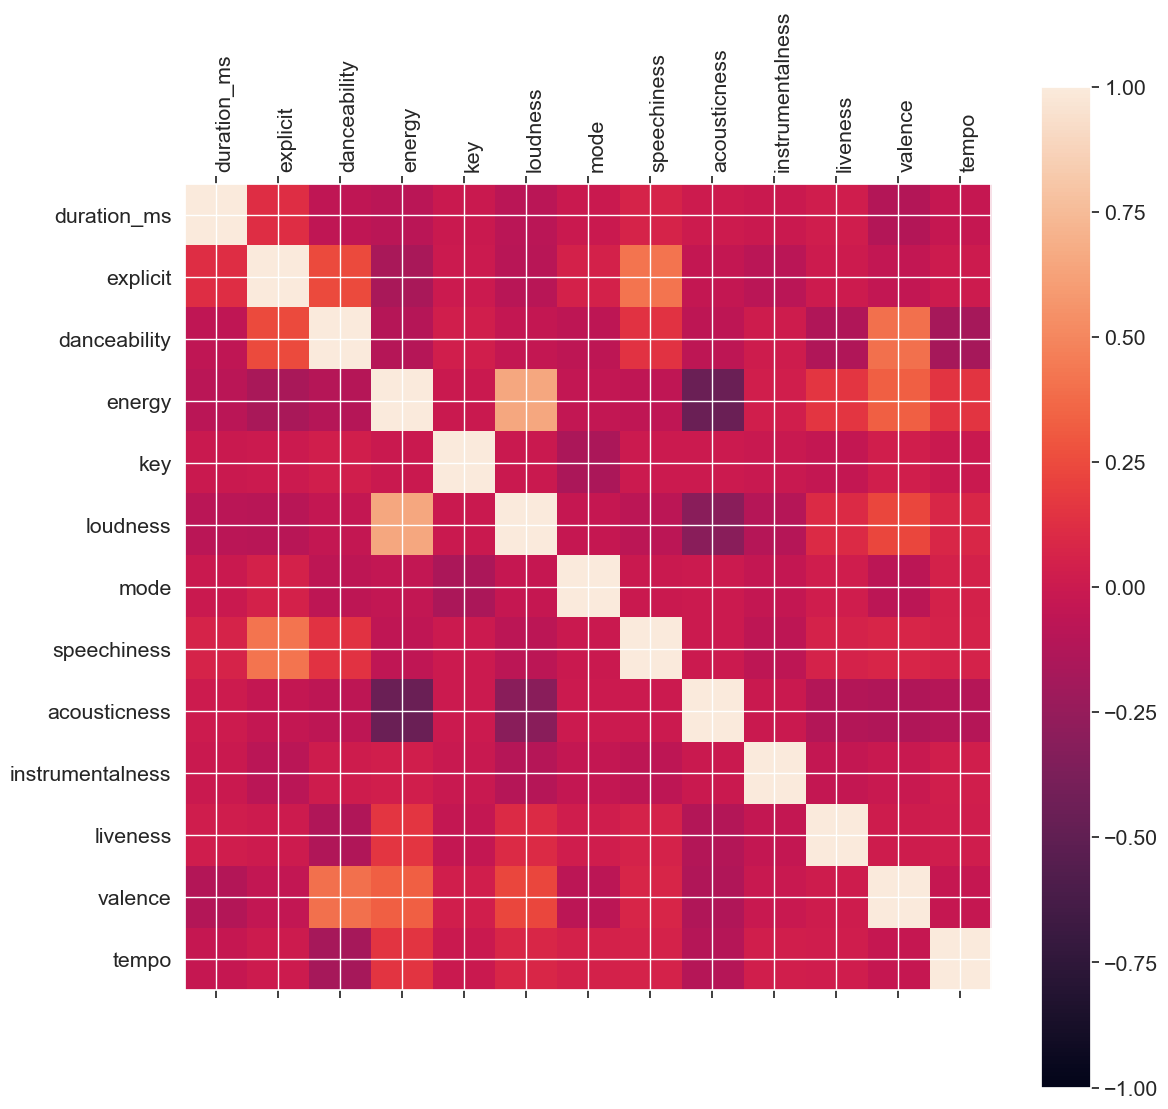

In [27]:
# correlation matrix
names = ['duration_ms','explicit', 'danceability', 'energy',
        'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
        'valence', 'tempo']
fig = plt.figure(figsize = (13, 13))
ax = fig.add_subplot(111)
cax = ax.matshow(df_new.corr(), vmin = -1, vmax = 1, interpolation = 'none')
fig.colorbar(cax)
ticks = np.arange(0,13,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names,rotation = 90,horizontalalignment = 'left')
ax.set_yticklabels(names)
print(color.BOLD + '## correlation matrix ##' + color.END)
plt.show()

## Scatterplot Matrix ##


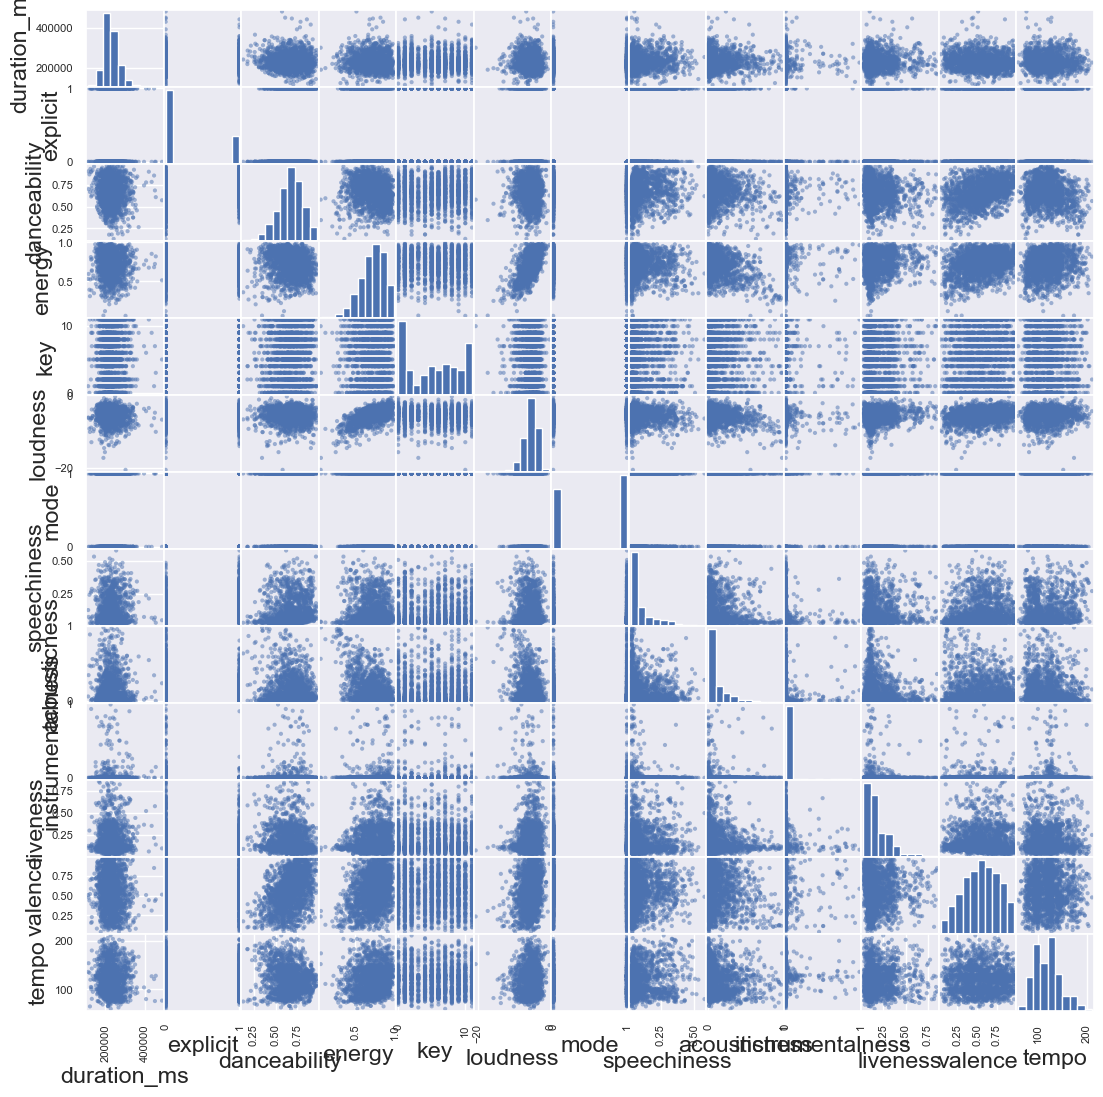

In [28]:
# Scatterplot Matrix
scatter_matrix(df_new,figsize=(13, 13))
print(color.BOLD + '## Scatterplot Matrix ##' + color.END)
plt.show()

<font color='#808080'>

**Part D:** Set aside the genre column and, if necessary, normalize all columns except popularity. Then, determine the relationship and influence of each feature on the song's popularity. (Hint: You can use statistical measures such as correlation to observe the impact of the data on the output and even their relationships with each other. For visualization, you can use pair-plots from the Seaborn library or heatmaps.)

In [29]:
df_pop = df
df_pop = df_pop.drop('vector', axis=1);
df_pop = df_pop.drop('new_genre', axis=1);
df_pop = df_pop.drop('genre', axis=1);
print(df_pop)
headings = df_pop.columns.tolist()
print(headings)

      duration_ms  explicit popularity  danceability  energy  key  loudness  mode  speechiness  \
0          211160         0          4         0.751   0.834    1    -5.444     0       0.0437   
1          167066         0          4         0.434   0.897    0    -4.918     1       0.0488   
2          250546         0          4         0.529   0.496    7    -9.007     1       0.0290   
3          224493         0          4         0.551   0.913    0    -4.063     0       0.0466   
4          200560         0          4         0.614   0.928    8    -4.806     0       0.0516   
...           ...       ...        ...           ...     ...  ...       ...   ...          ...   
1995       181026         0          4         0.842   0.734    1    -5.065     0       0.0588   
1996       178426         0          4         0.552   0.702    9    -5.707     1       0.1570   
1997       200593         0          4         0.847   0.678    9    -8.635     1       0.1090   
1998       171029   

In [30]:
df_popularity = df_pop['popularity']
df_pop = df_pop.drop('popularity', axis=1);
mean = df_pop.mean()
std = df_pop.std()
threshold = 3 * std
df_pop = (df_pop - df_pop.min()) / (df_pop.max() - df_pop.min())
df_pop['popularity'] = np.array(df_popularity)
print(df_pop)

      duration_ms  explicit  danceability    energy       key  loudness  mode  speechiness  \
0        0.264478       0.0      0.735225  0.825230  0.090909  0.744639   0.0     0.037084   
1        0.145673       0.0      0.360520  0.891961  0.000000  0.770630   1.0     0.046310   
2        0.370598       0.0      0.472813  0.467217  0.636364  0.568584   1.0     0.010492   
3        0.300402       0.0      0.498818  0.908908  0.000000  0.812877   0.0     0.042330   
4        0.235918       0.0      0.573286  0.924796  0.727273  0.776164   0.0     0.051375   
...           ...       ...           ...       ...       ...       ...   ...          ...   
1995     0.183286       0.0      0.842790  0.719309  0.090909  0.763366   0.0     0.064399   
1996     0.176281       0.0      0.500000  0.685415  0.818182  0.731643   1.0     0.242041   
1997     0.236007       0.0      0.848700  0.659994  0.818182  0.586965   1.0     0.155210   
1998     0.156351       0.0      0.723404  0.492638  0.72727

## correlation matrix ##


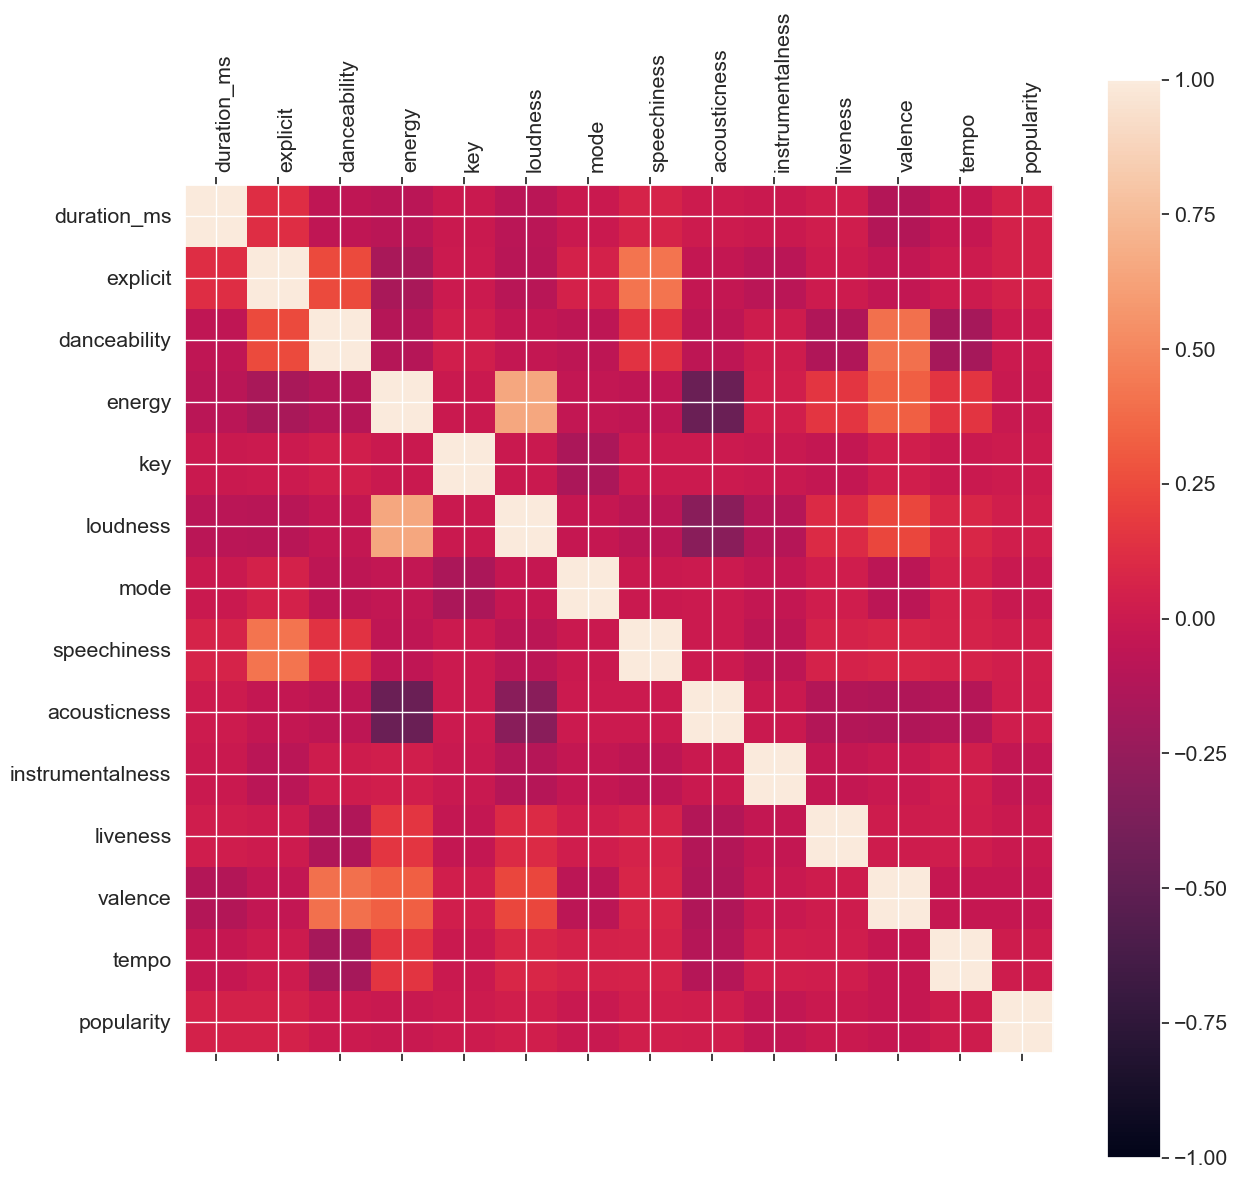

In [31]:
# correlation matrix
names = ['duration_ms','explicit', 'danceability', 'energy',
        'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
        'valence', 'tempo', 'popularity']
fig = plt.figure(figsize = (14, 14))
ax = fig.add_subplot(111)
cax = ax.matshow(df_pop.corr(), vmin = -1, vmax = 1, interpolation = 'none')
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation = 90, horizontalalignment = 'left')
ax.set_yticklabels(names)
print(color.BOLD + '## correlation matrix ##' + color.END)
plt.show()

## Scatterplot Matrix ##


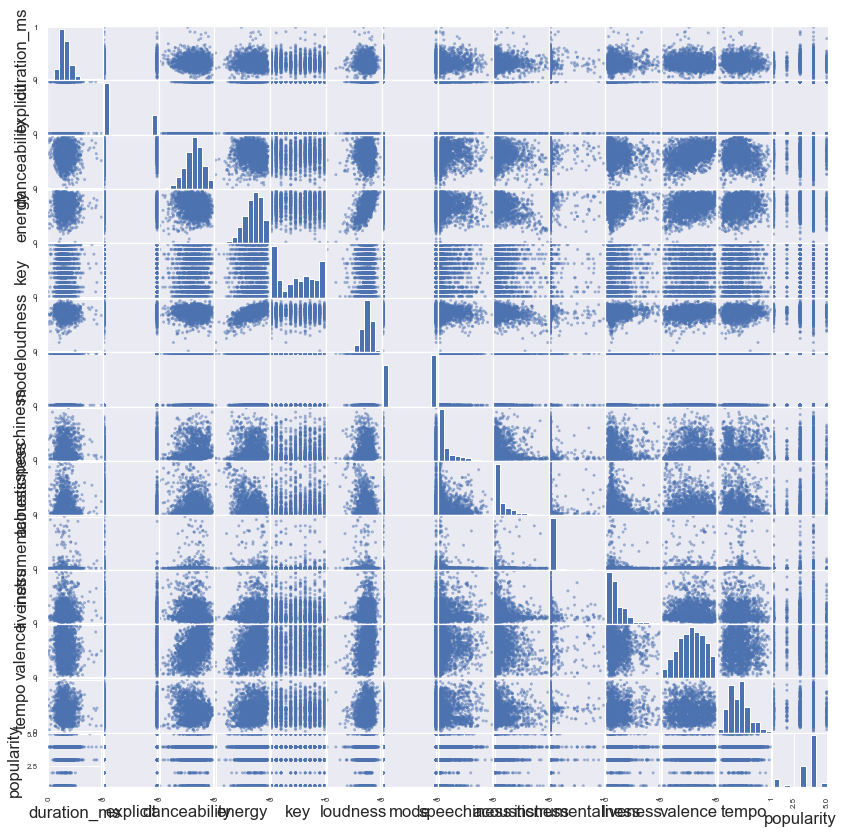

In [32]:
# Scatterplot Matrix
scatter_matrix(df_pop,figsize = (14, 14))
print(color.BOLD + '## Scatterplot Matrix ##' + color.END)
plt.show()

<font color='#808080'>

**Part E:** Split the entire dataset into three parts: training (80%), testing (10%), and validation (10%). It is suggested to allocate 80% to training, 10% to testing, and 10% to validation.

In [32]:
headings = df_pop.columns.tolist()
print(headings)
print(np.array(df_pop['popularity']))

['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'popularity']
[4 4 4 ... 4 4 5]


In [33]:
x = df_pop.drop('popularity', axis=1)
y = df_pop['popularity']
has_nan = y.isna().any().any()

if has_nan:
    nan_locations = np.where(y.isna())
    print(nan_locations)

In [34]:
x = df_pop.drop('popularity', axis=1)
y = df_pop['popularity']
X_train, X_remaining, y_train, y_remaining = train_test_split(x, y, test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size = 0.5, random_state = 42)
print("number of train data: ", len(X_train))
print("number of validation data: ", len(X_val))
print("number of test data: ", len(X_test))
print(y_test)

number of train data:  1600
number of validation data:  200
number of test data:  200
23      3
1930    4
907     4
1766    4
297     4
       ..
1425    4
185     1
123     4
342     3
1916    5
Name: popularity, Length: 200, dtype: int64


![comments](3.11.png)

##confusion matrix for Decision Tree Classifier ##


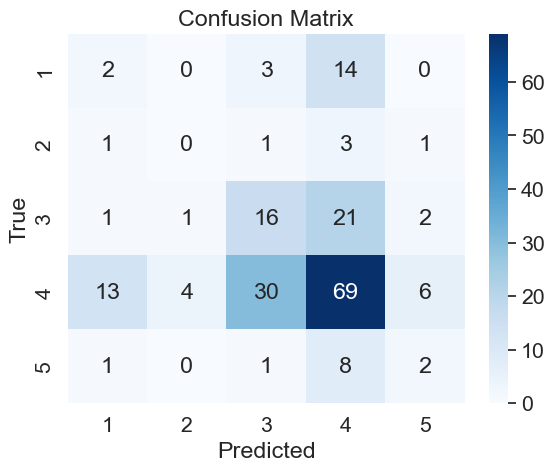

##Accuracy & Precision & Recall for Decision Tree Classifier ##
Accuracy: 0.445
Precision: 0.24133095662507426
Recall: 0.24554949949844623
##confusion matrix for Random Forest Classifier ##


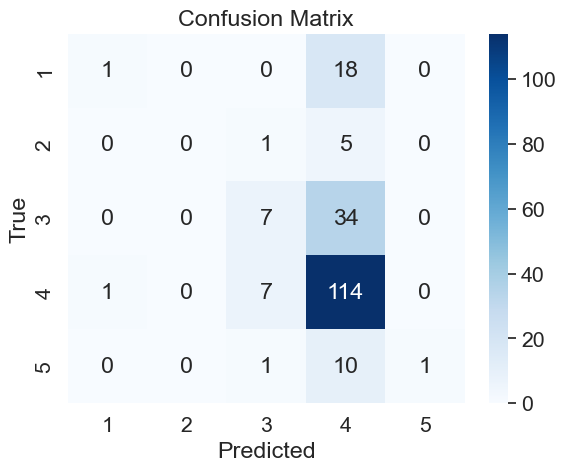

C:\Users\leila\AppData\Local\Temp\ipykernel_10308\1489110036.py:40: RuntimeWarning: invalid value encountered in divide
  precision_rf = np.mean(np.diagonal(cm_rf) / cm_rf.sum(axis=0))


##Accuracy & Precision & Recall for Random Forest Classifier ##
Accuracy: 0.615
Precision: nan
Recall: 0.2482245698211943
##confusion matrix for KNN Classifier ##


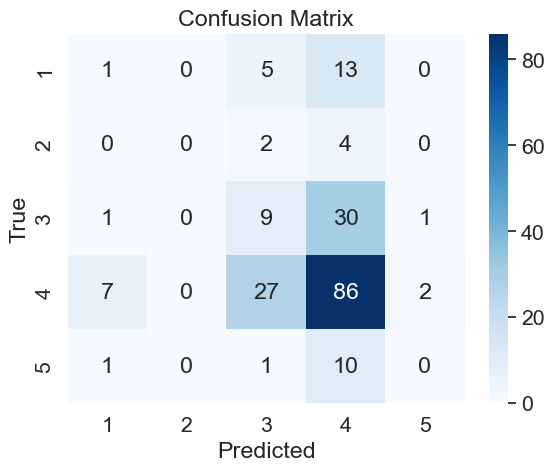

C:\Users\leila\AppData\Local\Temp\ipykernel_10308\1489110036.py:59: RuntimeWarning: invalid value encountered in divide
  precision_knn = np.mean(np.diagonal(cm_knn) / cm_knn.sum(axis=0))


##Accuracy & Precision & Recall for knn Classifier ##
Accuracy: 0.48
Precision: nan
Recall: 0.195412361371241
##confusion matrix for svm Classifier ##


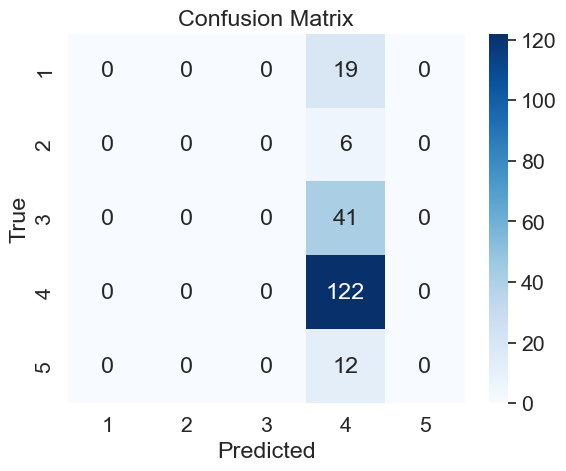

##Accuracy & Precision & Recall for svm Classifier ##
Accuracy: 0.61
Precision: nan
Recall: 0.2


C:\Users\leila\AppData\Local\Temp\ipykernel_10308\1489110036.py:77: RuntimeWarning: invalid value encountered in divide
  precision_svm = np.mean(np.diagonal(cm_svm) / cm_svm.sum(axis=0))


In [35]:
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier(n_neighbors = 5)
svm_model = SVC(kernel = 'rbf')

dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

print(color.BOLD + '##confusion matrix for Decision Tree Classifier ##' + color.END)
ydt_pred = dt_model.predict(X_test)
cm_dt = confusion_matrix(y_test, ydt_pred)
labels = ['1', '2', '3', '4', '5']
sns.set(font_scale = 1.4)
sns.heatmap(cm_dt, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
accuracy_dt = np.diagonal(cm_dt).sum() / cm_dt.sum()
precision_dt = np.mean(np.diagonal(cm_dt) / cm_dt.sum(axis=0))
recall_dt = np.mean(np.diagonal(cm_dt) / cm_dt.sum(axis=1))
print(color.BOLD + '##Accuracy & Precision & Recall for Decision Tree Classifier ##' + color.END)
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)

print(color.BOLD + '##confusion matrix for Random Forest Classifier ##' + color.END)
yrf_pred = rf_model.predict(X_test)
cm_rf = confusion_matrix(y_test, yrf_pred)
labels = ['1', '2', '3', '4', '5']
sns.set(font_scale = 1.4)
sns.heatmap(cm_rf, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
accuracy_rf = np.diagonal(cm_rf).sum() / cm_rf.sum()
precision_rf = np.mean(np.diagonal(cm_rf) / cm_rf.sum(axis=0))
recall_rf = np.mean(np.diagonal(cm_rf) / cm_rf.sum(axis=1))
print(color.BOLD + '##Accuracy & Precision & Recall for Random Forest Classifier ##' + color.END)
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)


print(color.BOLD + '##confusion matrix for KNN Classifier ##' + color.END)
yknn_pred = knn_model.predict(X_test)
cm_knn = confusion_matrix(y_test, yknn_pred)
labels = ['1', '2', '3', '4', '5']
sns.set(font_scale = 1.4)
sns.heatmap(cm_knn, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
accuracy_knn = np.diagonal(cm_knn).sum() / cm_knn.sum()
precision_knn = np.mean(np.diagonal(cm_knn) / cm_knn.sum(axis=0))
recall_knn = np.mean(np.diagonal(cm_knn) / cm_knn.sum(axis=1))
print(color.BOLD + '##Accuracy & Precision & Recall for knn Classifier ##' + color.END)
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)

print(color.BOLD + '##confusion matrix for svm Classifier ##' + color.END)
ysvm_pred = svm_model.predict(X_test)
cm_svm = confusion_matrix(y_test, ysvm_pred)
labels = ['1', '2', '3', '4', '5']
sns.set(font_scale = 1.4)
sns.heatmap(cm_svm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
accuracy_svm = np.diagonal(cm_svm).sum() / cm_svm.sum()
precision_svm = np.mean(np.diagonal(cm_svm) / cm_svm.sum(axis=0))
recall_svm = np.mean(np.diagonal(cm_svm) / cm_svm.sum(axis=1))
print(color.BOLD + '##Accuracy & Precision & Recall for svm Classifier ##' + color.END)
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)

<font color='#808080'>

**Part F:** This time, ignore the popularity column and instead consider the genre column. In this column, identify the most frequent and least frequent genres. Naturally, a song can belong to multiple genres simultaneously. Find the maximum number of genres associated with a single song. If a song is classified under multiple genres, calculate the probability percentage. (Hint: Use the law of total probability.) For example, if a song is classified under both pop and hip-hop, calculate the probability of it also being classified under R&B.

In [36]:
df_pop = df
df_pop = df_pop.drop('vector', axis=1);
df_pop = df_pop.drop('new_genre', axis=1);
df_pop = df_pop.drop('popularity', axis=1);
print(df_pop)
headings = df_pop.columns.tolist()
print(headings)

      duration_ms  explicit  danceability  energy  key  loudness  mode  speechiness  acousticness  \
0          211160         0         0.751   0.834    1    -5.444     0       0.0437        0.3000   
1          167066         0         0.434   0.897    0    -4.918     1       0.0488        0.0103   
2          250546         0         0.529   0.496    7    -9.007     1       0.0290        0.1730   
3          224493         0         0.551   0.913    0    -4.063     0       0.0466        0.0263   
4          200560         0         0.614   0.928    8    -4.806     0       0.0516        0.0408   
...           ...       ...           ...     ...  ...       ...   ...          ...           ...   
1995       181026         0         0.842   0.734    1    -5.065     0       0.0588        0.0427   
1996       178426         0         0.552   0.702    9    -5.707     1       0.1570        0.1170   
1997       200593         0         0.847   0.678    9    -8.635     1       0.1090        

In [37]:
unique_genres = df['genre'].str.split(', ').explode().value_counts()
most_common_genre = unique_genres.index[0]
least_common_genre = unique_genres.index[-1]
print(color.BOLD + '## most common genre is: ##' + color.END)
print(most_common_genre)
print(color.BOLD + '## least common genre is: ##' + color.END)
print(least_common_genre)
max_genre_count = df['genre'].str.split(',').apply(lambda x: len(x)).max()
print(color.BOLD + '## max genre count is: ##' + color.END)
print(max_genre_count)

## most common genre is: ##
pop
## least common genre is: ##
classical
## max genre count is: ##
4
